In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

In [2]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

import severability

In [3]:
G = nx.grid_2d_graph(5,5)
A = nx.adjacency_matrix(G).toarray()
P = severability.transition_matrix(A)

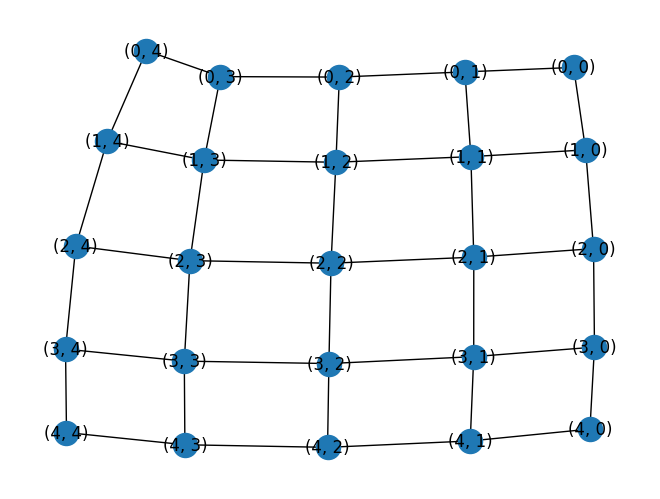

In [4]:
nx.draw(G,with_labels=True)

In [39]:
times = np.arange(0,100,2, dtype="int")
n_communities = np.zeros_like(times)
s_communities = np.zeros_like(times)

for i in tqdm(range(len(times))):
    t = times[i]
    partition = severability.component_cover(P,t=t)
    n_communities[i] = len(partition)
    sizes = np.zeros(len(partition))
    for j in range((len(partition))):
        sizes[j] = len(partition[j][0])
    s_communities[i] = sizes.mean()
    

100%|██████████| 50/50 [00:41<00:00,  1.21it/s]


[Text(0.5, 0, 'time'), Text(0, 0.5, 'number communities')]

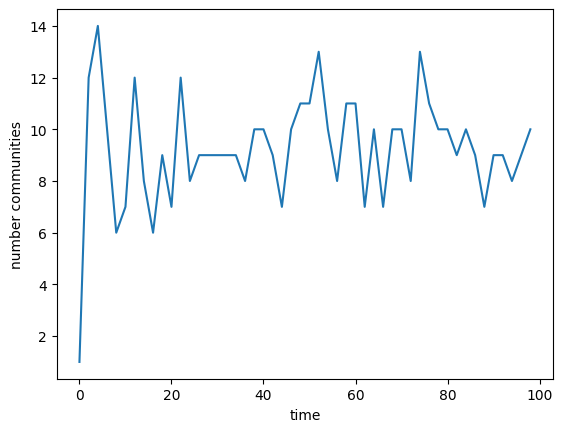

In [40]:
fig, ax = plt.subplots(1)
ax.plot(times,n_communities)
ax.set(xlabel="time", ylabel="number communities")

[Text(0.5, 0, 'time'), Text(0, 0.5, 'mean community size')]

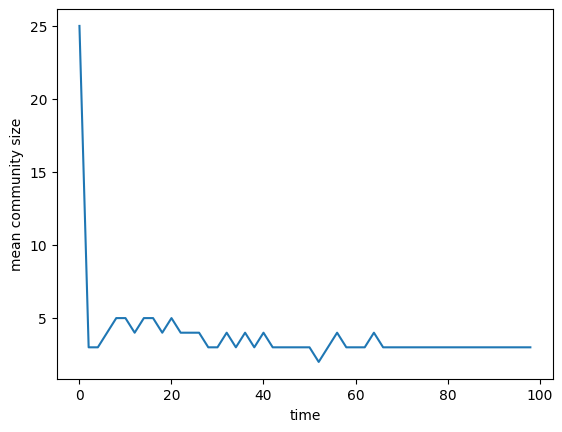

In [41]:
fig, ax = plt.subplots(1)
ax.plot(times,s_communities)
ax.set(xlabel="time", ylabel="mean community size")